Hola **Roberto**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# Proyecto Final: Telecomunicaciones: identificar operadores ineficaces

# Ejercicio

El servicio de telefonía virtual CallMeMaybe está desarrollando una nueva función que brindará a los supervisores y las supervisores información sobre los operadores menos eficaces. Se considera que un operador es ineficaz si tiene una gran cantidad de llamadas entrantes perdidas (internas y externas) y un tiempo de espera prolongado para las llamadas entrantes. Además, si se supone que un operador debe realizar llamadas salientes, un número reducido de ellas también será un signo de ineficacia.

In [203]:
import pandas as pd 
from matplotlib import pyplot as plt
import plotly.express as px
from scipy import stats
from scipy import stats as st
import numpy as np
import plotly.express as px
import plotly.express as px
from math import factorial
from datetime import datetime
import seaborn as sns
from scipy.stats import ttest_ind, linregress
from scipy.stats import ttest_ind
from scipy.stats import pearsonr

In [204]:
# Cargar el dataset de telecomunicaciones
telecom_data = pd.read_csv('/datasets/telecom_dataset_us.csv')

# Cargar el dataset de clientes
clients_data = pd.read_csv('/datasets/telecom_clients_us.csv')

## Análisis exploratorio de datos

In [205]:
# Ver las primeras filas del dataset de telecomunicaciones
telecom_data.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


In [206]:
# Ver información general sobre los datos
print(telecom_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB
None


In [207]:
# Convertir la columna 'date' a formato datetime
telecom_data['date'] = pd.to_datetime(telecom_data['date']).dt.tz_localize(None)

# Verificar el cambio
print(telecom_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              53902 non-null  int64         
 1   date                 53902 non-null  datetime64[ns]
 2   direction            53902 non-null  object        
 3   internal             53785 non-null  object        
 4   operator_id          45730 non-null  float64       
 5   is_missed_call       53902 non-null  bool          
 6   calls_count          53902 non-null  int64         
 7   call_duration        53902 non-null  int64         
 8   total_call_duration  53902 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 3.3+ MB
None


In [208]:
telecom_data.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04,in,False,NaN,True,2,0,4
1,166377,2019-08-05,out,True,880022.0,True,3,0,5
2,166377,2019-08-05,out,True,880020.0,True,1,0,1
3,166377,2019-08-05,out,True,880020.0,False,1,10,18
4,166377,2019-08-05,out,False,880022.0,True,3,0,25


In [209]:
# Resumen estadístico de los valores numéricos
print(telecom_data.describe())

             user_id    operator_id   calls_count  call_duration  \
count   53902.000000   45730.000000  53902.000000   53902.000000   
mean   167295.344477  916535.993002     16.451245     866.684427   
std       598.883775   21254.123136     62.917170    3731.791202   
min    166377.000000  879896.000000      1.000000       0.000000   
25%    166782.000000  900788.000000      1.000000       0.000000   
50%    167162.000000  913938.000000      4.000000      38.000000   
75%    167819.000000  937708.000000     12.000000     572.000000   
max    168606.000000  973286.000000   4817.000000  144395.000000   

       total_call_duration  
count         53902.000000  
mean           1157.133297  
std            4403.468763  
min               0.000000  
25%              47.000000  
50%             210.000000  
75%             902.000000  
max          166155.000000  


In [210]:
# Verificar valores nulos
print(telecom_data.isnull().sum())

user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64


In [211]:
# Reemplazar valores nulos 
telecom_data['internal'] = telecom_data['internal'].fillna("")

In [212]:
# Reemplazar valores vacíos en operator_id con "Op_no_identific"
telecom_data["operator_id"] = telecom_data["operator_id"].fillna("Op_no_identific")
##telecom_data['operator_id'] = telecom_data['operator_id'].fillna("")##

# Verificar que el cambio se haya aplicado correctamente
telecom_data.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04,in,False,Op_no_identific,True,2,0,4
1,166377,2019-08-05,out,True,880022.0,True,3,0,5
2,166377,2019-08-05,out,True,880020.0,True,1,0,1
3,166377,2019-08-05,out,True,880020.0,False,1,10,18
4,166377,2019-08-05,out,False,880022.0,True,3,0,25


In [213]:
# Verificar valores nulos
print(telecom_data.isnull().sum())

user_id                0
date                   0
direction              0
internal               0
operator_id            0
is_missed_call         0
calls_count            0
call_duration          0
total_call_duration    0
dtype: int64


In [214]:
# Ver las primeras filas del dataset de clientes
clients_data.head()

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


In [215]:
# Ver información general sobre los datos
print(clients_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB
None


In [216]:
# Convertir la columna 'date' a formato datetime
clients_data['date_start'] = pd.to_datetime(clients_data['date_start'])

# Verificar el cambio
print(clients_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB
None


In [217]:
clients_data.head()

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


In [218]:
# Resumen estadístico de los valores numéricos
print(clients_data.describe())

             user_id
count     732.000000
mean   167431.927596
std       633.810383
min    166373.000000
25%    166900.750000
50%    167432.000000
75%    167973.000000
max    168606.000000


In [219]:
# Verificar valores nulos
print(clients_data.isnull().sum())

user_id        0
tariff_plan    0
date_start     0
dtype: int64


In [220]:
##Identificar valores únicos en columnas clave 

print(telecom_data['direction'].unique())  # Tipos de dirección de llamada
print(telecom_data['internal'].unique())   # Valores internos
print(telecom_data['is_missed_call'].unique())  # Llamadas perdidas

['in' 'out']
[False True '']
[ True False]


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo, realizaste el procesamiento y revisión de tus datos correctamente. Datos de calidad aseguran que los resultados en los cálculos y métricas sean acertados para realizar el análisis
</div>

## Analisis de Variables

1.Revisar la estructura de los datos: Ver los tipos de datos y valores únicos para identificar posibles problemas de formato.

Analizar distribuciones:

1.Distribuciones categóricas como direction e internal.

2.Detectar valores atípicos: Usar diagramas de caja para identificar operadores con tiempos de espera excesivos o muchos intentos fallidos.

3.Correlaciones: Analizar la relación entre variables, por ejemplo, si un alto tiempo de espera está ligado a más llamadas perdidas.



In [221]:
# Filtrar operadores no identificados
telecom_data_filtered = telecom_data[telecom_data["operator_id"] != "Op_no_identific"]

# Calcular llamadas entrantes perdidas por operador
ineffective_operators = telecom_data[telecom_data['is_missed_call'] == True].groupby('operator_id')['calls_count'].sum().reset_index()
ineffective_operators.rename(columns={'calls_count': 'missed_calls'}, inplace=True)

# Calcular tiempo de espera promedio por operador
telecom_data['waiting_time'] = telecom_data['total_call_duration'] - telecom_data['call_duration']
waiting_time_avg = telecom_data.groupby('operator_id')['waiting_time'].mean().reset_index()
ineffective_operators = ineffective_operators.merge(waiting_time_avg, on='operator_id', how='left')

# Calcular número de llamadas salientes realizadas
outgoing_calls = telecom_data[telecom_data['direction'] == 'out'].groupby('operator_id')['calls_count'].sum().reset_index()
outgoing_calls.rename(columns={'calls_count': 'outgoing_calls'}, inplace=True)
ineffective_operators = ineffective_operators.merge(outgoing_calls, on='operator_id', how='left')

# Reemplazar valores NaN en 'outgoing_calls' con 0 (operadores que no hacen llamadas salientes)
ineffective_operators['outgoing_calls'].fillna(0, inplace=True)

# Ordenar por número de llamadas perdidas y tiempo de espera alto
ineffective_operators = ineffective_operators.sort_values(by=['missed_calls', 'waiting_time'], ascending=False)

# Mostrar los operadores menos eficaces
print(ineffective_operators)  


         operator_id  missed_calls  waiting_time  outgoing_calls
876  Op_no_identific        112668    167.742291           549.0
24          885876.0         27388   4816.241379         64897.0
25          885890.0         26141   5727.133574         64653.0
474         929428.0         19638   5325.342857         24572.0
452         925922.0         10023   5907.443038         21754.0
..               ...           ...           ...             ...
750         949420.0             1      2.400000             1.0
659         941826.0             1      2.000000             1.0
432         924572.0             1      1.000000             1.0
306         914626.0             1      0.000000             1.0
813         958458.0             1      0.000000             1.0

[877 rows x 4 columns]


**Son muchos datos para hacer un histograma con todos los operadores por eso vamos a filtrar los 20 operadores mas ineficaz** 

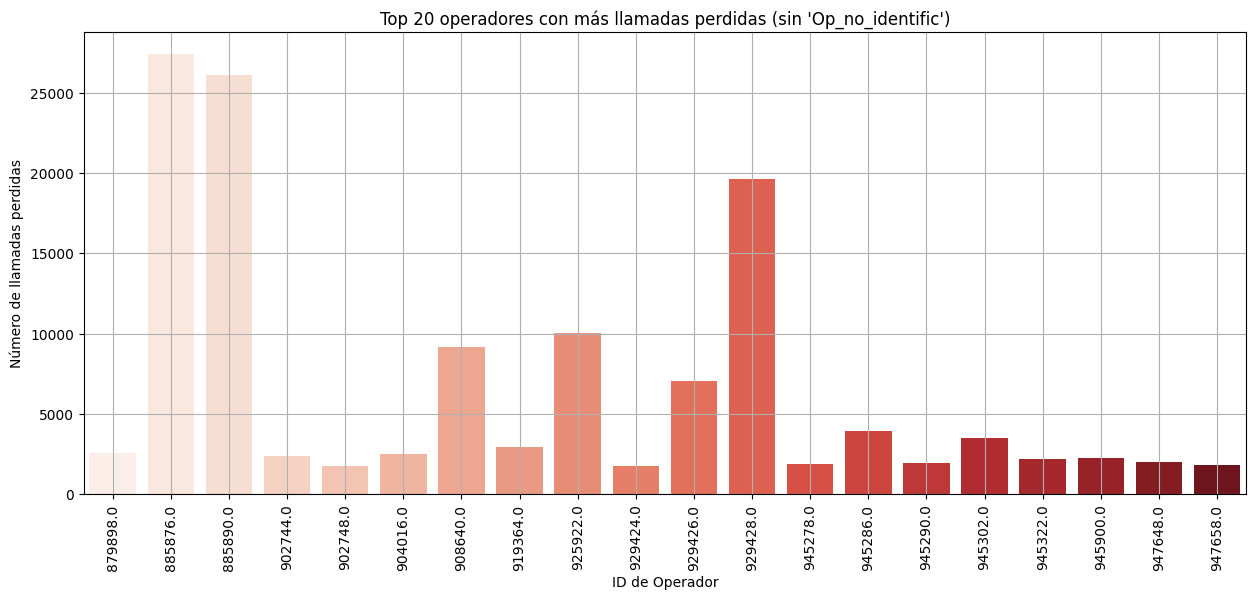

In [222]:
# Filtrar los operadores más ineficaces
top_20_inefficient = ineffective_operators.sort_values(by="missed_calls", ascending= False)

# Excluir operadores con 'Op_no_identific'
top_20_inefficient = top_20_inefficient[top_20_inefficient["operator_id"] != "Op_no_identific"]

# Seleccionar los 20 operadores más ineficaces después de la exclusión
top_20_inefficient = top_20_inefficient.head(20)

# Graficar el histograma
plt.figure(figsize=(15, 6))
sns.barplot(x=top_20_inefficient["operator_id"], y=top_20_inefficient["missed_calls"], palette="Reds")

# Mejorar etiquetas y título
plt.xticks(rotation=90)
plt.title("Top 20 operadores con más llamadas perdidas (sin 'Op_no_identific')")
plt.xlabel("ID de Operador")
plt.ylabel("Número de llamadas perdidas")
plt.grid()

plt.show()

Muestra los 20 operadores menos eficaces y que tengan alta cantidad de llamadas perdidas, excluyendo aquellos con "Op_no_identific" en operator_id

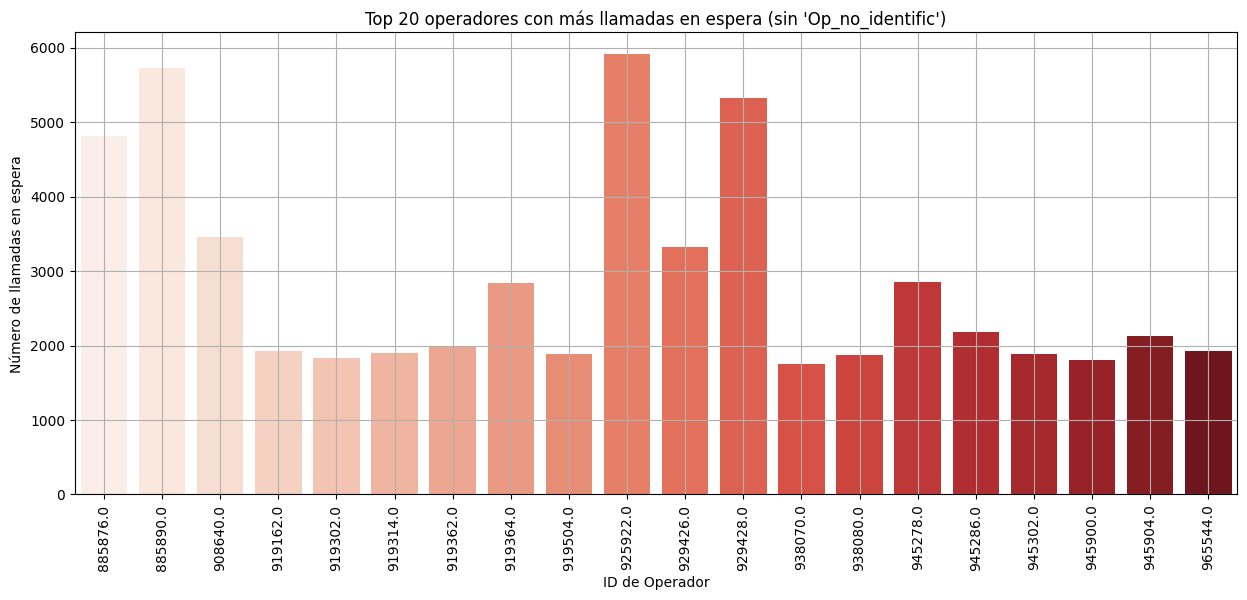

In [223]:
# Filtrar los operadores más ineficaces
top_20_inefficient = ineffective_operators.sort_values(by="waiting_time", ascending= False)

# Excluir operadores con 'Op_no_identific'
top_20_inefficient = top_20_inefficient[top_20_inefficient["operator_id"] != "Op_no_identific"]

# Seleccionar los 20 operadores más ineficaces después de la exclusión
top_20_inefficient = top_20_inefficient.head(20)

# Graficar el histograma
plt.figure(figsize=(15, 6))
sns.barplot(x=top_20_inefficient["operator_id"], y=top_20_inefficient["waiting_time"], palette="Reds")

# Mejorar etiquetas y título
plt.xticks(rotation=90)
plt.title("Top 20 operadores con más llamadas en espera (sin 'Op_no_identific')")
plt.xlabel("ID de Operador")
plt.ylabel("Número de llamadas en espera")
plt.grid()

plt.show()

Muestra los 20 operadores menos eficaces y que tengan alta cantidad de llamadasen espera, excluyendo aquellos con "Op_no_identific" en operator_id

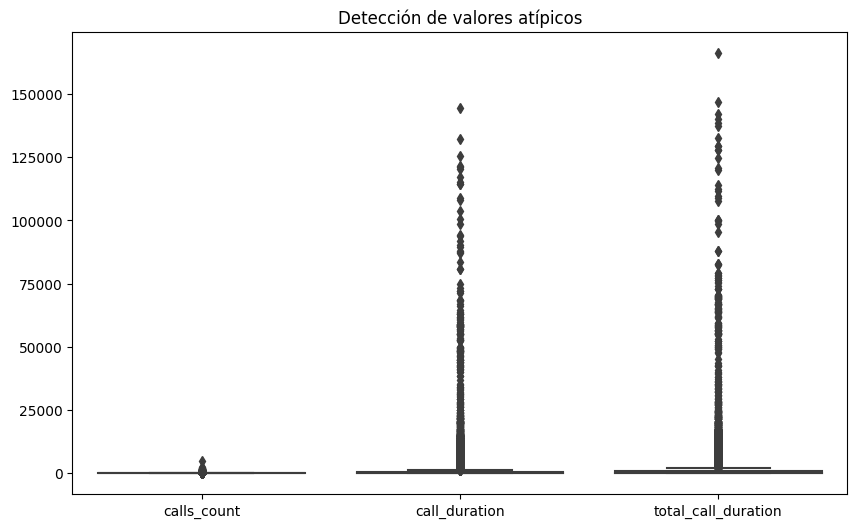

In [224]:
#Num Column
numeric_columns = ["calls_count", "call_duration", "total_call_duration"]

# Diagramas de caja para valores atípicos
plt.figure(figsize=(10, 6))
sns.boxplot(data=telecom_data[numeric_columns])
plt.title("Detección de valores atípicos")
plt.show()

Si observamos que hay puntos fuera del rango intercuartil en calls_count, podríamos identificar operadores que reciben muchas menos llamadas de lo esperado.
Para call_duration y total_call_duration, si hay valores atípicos extremadamente altos, esto puede sugerir tiempos de espera excesivos o llamadas que duran mucho más que el promedio.
Si los datos presentan mucha variabilidad, significa que hay una diferencia significativa entre operadores eficientes e ineficientes.



In [225]:
# Contar valores de categorías
print(telecom_data["direction"].value_counts())
print(telecom_data["internal"].value_counts())

out    31917
in     21985
Name: direction, dtype: int64
False    47621
True      6164
           117
Name: internal, dtype: int64


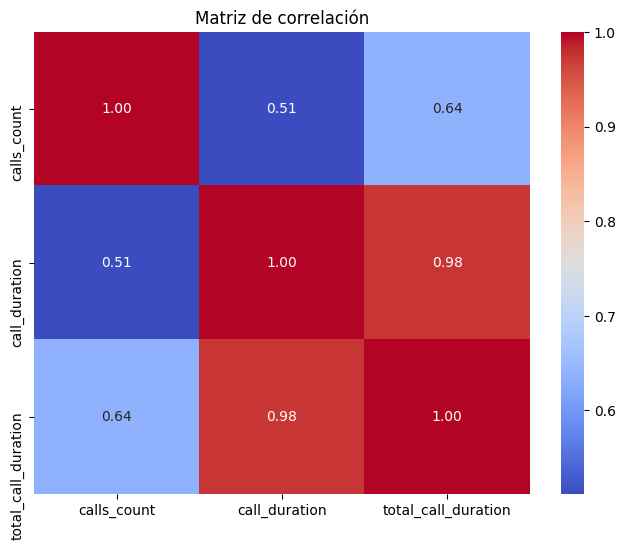

In [226]:
# Matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(telecom_data[numeric_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

Si total_call_duration está fuertemente correlacionado con call_count, podría sugerir que tiempos de espera largos aumentan la probabilidad de que la llamada se pierda.
Una baja correlación entre calls_count y call_duration podría indicar que la cantidad de llamadas no está afectando su duración, lo que podría ser útil para definir eficiencia.

In [227]:
# Dividir la duración de la llamada entre el número de llamadas para obtener la duración promedio de la llamada.
# Calcular duración promedio de la llamada
telecom_data["avg_call_duration"] = telecom_data["call_duration"] / telecom_data["calls_count"]

# Mostrar las primeras filas para verificar el cálculo
print(telecom_data[["operator_id", "calls_count", "call_duration", "avg_call_duration"]].head())

       operator_id  calls_count  call_duration  avg_call_duration
0  Op_no_identific            2              0                0.0
1         880022.0            3              0                0.0
2         880020.0            1              0                0.0
3         880020.0            1             10               10.0
4         880022.0            3              0                0.0


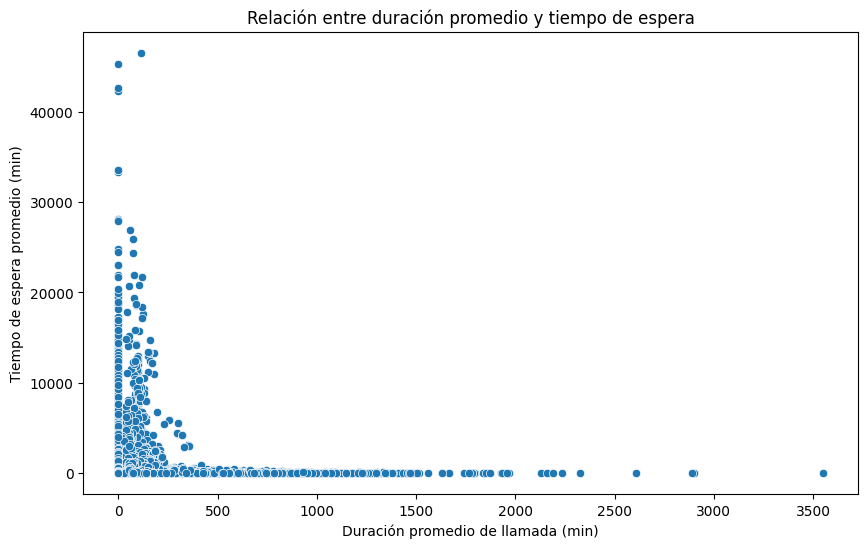

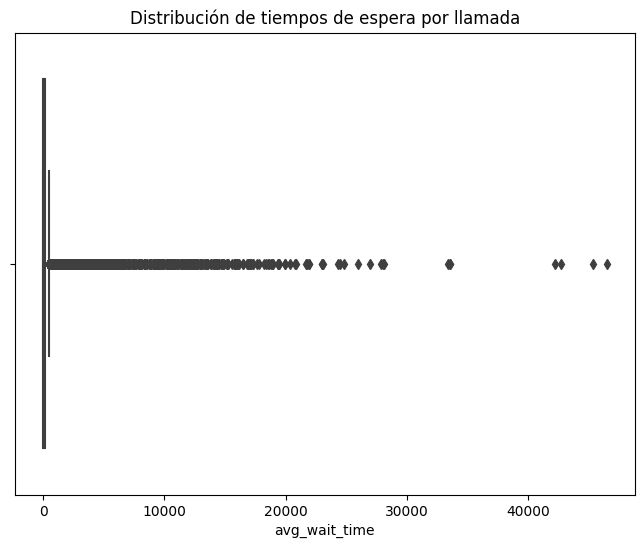

In [228]:
# Calcular tiempo de espera promedio por llamada
telecom_data["avg_wait_time"] = telecom_data["total_call_duration"] - telecom_data["call_duration"]

# Scatter plot para ver la relación entre duración promedio y tiempo de espera promedio
plt.figure(figsize=(10, 6))
sns.scatterplot(x=telecom_data["avg_call_duration"], y=telecom_data["avg_wait_time"])
plt.xlabel("Duración promedio de llamada (min)")
plt.ylabel("Tiempo de espera promedio (min)")
plt.title("Relación entre duración promedio y tiempo de espera")
plt.show()

# Boxplot para analizar la variabilidad de tiempos de espera
plt.figure(figsize=(8, 6))
sns.boxplot(x=telecom_data["avg_wait_time"])
plt.title("Distribución de tiempos de espera por llamada")
plt.show()

Vemos una fuerte correlación entre tiempos de espera altos y duración promedio alta, podría sugerir que los operadores ineficientes están gestionando llamadas con demoras excesivas.
Gráfico de dispersión: Relación entre duración promedio y tiempo de espera promedio
Este gráfico muestra cómo se relacionan la duración promedio de las llamadas (avg_call_duration) con el tiempo de espera promedio (avg_wait_time).
Si vemos una fuerte tendencia ascendente, significa que los operadores con llamadas más largas también tienen tiempos de espera altos. Esto podría sugerir que los operadores están lidiando con tiempos de espera prolongados antes de poder hablar con la persona que llama.
Si hay una gran dispersión sin un patrón claro, podría indicar que los tiempos de espera varían aleatoriamente y no están necesariamente ligados a la duración de la llamada.
Operadores con puntos extremadamente altos en avg_wait_time pueden ser candidatos a la clasificación como ineficientes.
Diagrama de caja: Distribución de tiempos de espera por llamada:
Este gráfico nos ayuda a identificar la variabilidad y posibles valores atípicos en el tiempo de espera.
Si la caja es muy extendida, significa que hay una gran variabilidad en los tiempos de espera entre operadores.
#Puntos fuera de los "bigotes" representan operadores con tiempos de espera anormalmente altos. Estos podrían ser operadores ineficaces.#
Si los tiempos de espera están mayormente concentrados en valores bajos, entonces el tiempo de espera no sería un problema significativo en la mayoría de los operadores.


## Operadores con mas tiempos de espera, que tienen más largos tiempos para las llamadas entrantes

In [229]:
# Filtrar operadores no identificados
telecom_data_filtered = telecom_data[telecom_data["operator_id"] != "Op_no_identific"]

# Filtrar solo llamadas entrantes
incoming_calls = telecom_data[telecom_data["direction"] == "in"]

# Calcular tiempo de espera promedio por operador
operator_wait_times = incoming_calls.groupby("operator_id")["avg_wait_time"].mean().reset_index()

# Ordenar operadores por mayor tiempo de espera
operator_wait_times_sorted = operator_wait_times.sort_values(by="avg_wait_time", ascending=False)

# Mostrar los operadores con tiempos de espera más largos
print(operator_wait_times_sorted.head(10))


    operator_id  avg_wait_time
337    919794.0    1039.540541
206    906070.0     853.312500
335    919790.0     839.802817
445    931458.0     655.236364
207    906076.0     611.500000
358    921318.0     607.466667
328    919204.0     579.277778
333    919552.0     556.776316
288    913938.0     535.047619
334    919554.0     518.154762


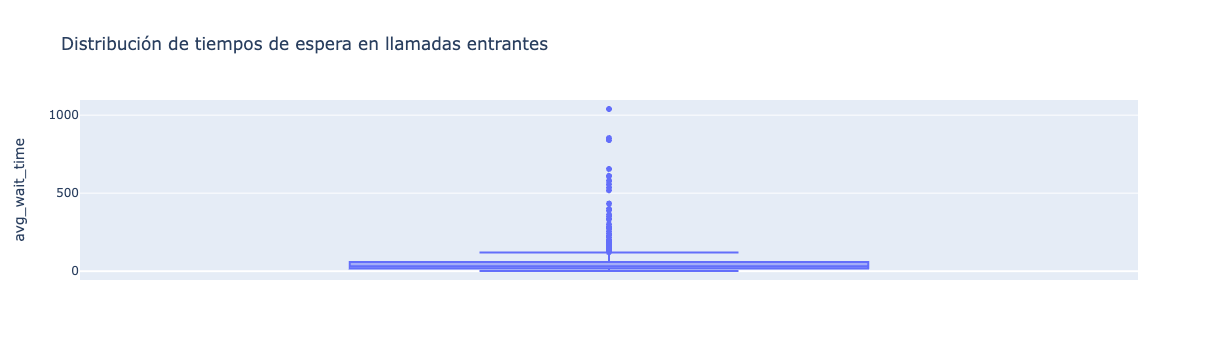

In [230]:
# Crear gráfico de caja dinámico
fig = px.box(operator_wait_times_sorted, y="avg_wait_time", title="Distribución de tiempos de espera en llamadas entrantes")

# Mostrar gráfico interactivo
fig.show()

Este gráfico mostrará la variabilidad de los tiempos de espera entre operadores. Los valores fuera de los bigotes representan operadores con tiempos de espera anormalmente altos,Si hay una gran dispersión, podríamos para detectar los operadores menos eficaces.

## Operadores que tienen un bajo número de llamadas salientes realizadas

In [231]:
# Filtrar solo llamadas salientes
outgoing_calls = telecom_data[telecom_data["direction"] == "out"]

# Calcular número total de llamadas salientes por operador
operator_outgoing_calls = outgoing_calls.groupby("operator_id")["calls_count"].sum().reset_index()

# Ordenar operadores por menor número de llamadas salientes
operator_outgoing_calls_sorted = operator_outgoing_calls.sort_values(by="calls_count", ascending=True)

# Mostrar los operadores con menos llamadas salientes
print(operator_outgoing_calls_sorted.head(10))

    operator_id  calls_count
486    930816.0            1
782    954284.0            1
139    900192.0            1
291    914256.0            1
629    940610.0            1
841    963716.0            1
680    945058.0            1
293    914272.0            1
45     890234.0            1
297    914440.0            1


Lista de los operadores que han realizado menos llamadas salientes. Si estos operadores tienen asignada la tarea de realizar llamadas salientes, su bajo rendimiento podría ser un indicador de ineficacia.

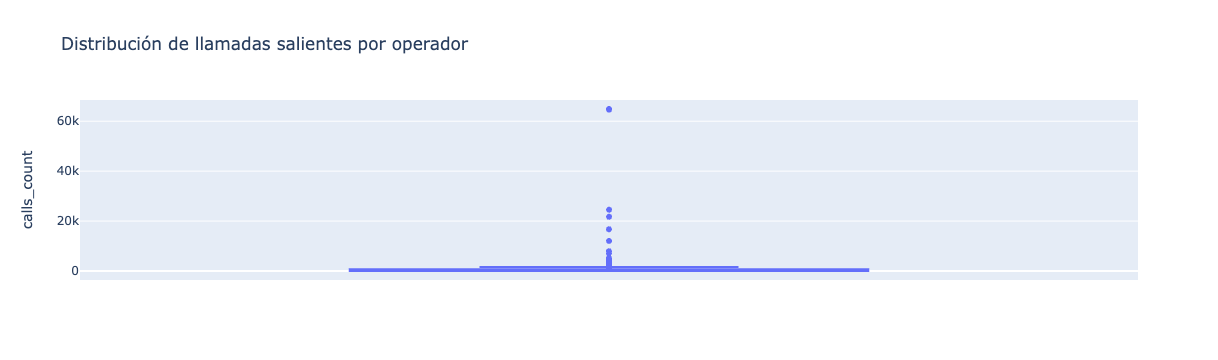

In [232]:
# Crear gráfico de caja dinámico para llamadas salientes
fig = px.box(operator_outgoing_calls_sorted, y="calls_count", title="Distribución de llamadas salientes por operador")

# Mostrar gráfico interactivo
fig.show()

Podemos ver que los valores fuera de los bigotes, son operadores que podrían tener un desempeño significativamente bajo.

### Afectación de los operadores ineficaces a la experiencia del cliente

In [233]:
# Filtrar operadores no identificados
telecom_data_filtered = telecom_data[telecom_data["operator_id"] != "Op_no_identific"]

# Filtrar solo llamadas entrantes
incoming_calls = telecom_data[telecom_data["direction"] == "in"]

# Calcular la tasa de llamadas perdidas por operador
missed_calls_by_operator = incoming_calls.groupby("operator_id")["is_missed_call"].sum()
total_calls_by_operator = incoming_calls.groupby("operator_id")["calls_count"].sum()

# Calcular la tasa de llamadas perdidas
operator_missed_call_rate = (missed_calls_by_operator / total_calls_by_operator).reset_index()
operator_missed_call_rate.columns = ["operator_id", "missed_call_rate"]

# Calcular el tiempo de espera promedio por operador
operator_avg_wait_time = incoming_calls.groupby("operator_id")["avg_wait_time"].mean().reset_index()
operator_avg_wait_time.columns = ["operator_id", "avg_wait_time"]

# Unir ambos resultados en un solo dataframe
operator_inefficiency = pd.merge(operator_missed_call_rate, operator_avg_wait_time, on="operator_id")

# Mostrar los primeros operadores con peor desempeño
print(operator_inefficiency.sort_values(by=["missed_call_rate", "avg_wait_time"], ascending=False).head(10))



    operator_id  missed_call_rate  avg_wait_time
641    948756.0          1.000000       8.000000
287    913886.0          0.500000      13.500000
467    934098.0          0.333333      31.800000
698    957922.0          0.333333      13.000000
497    937432.0          0.333333      12.000000
185    904344.0          0.285714      31.000000
109    897872.0          0.250000      20.500000
431    930242.0          0.250000      17.250000
265    910226.0          0.250000      16.500000
338    919896.0          0.250000      15.571429


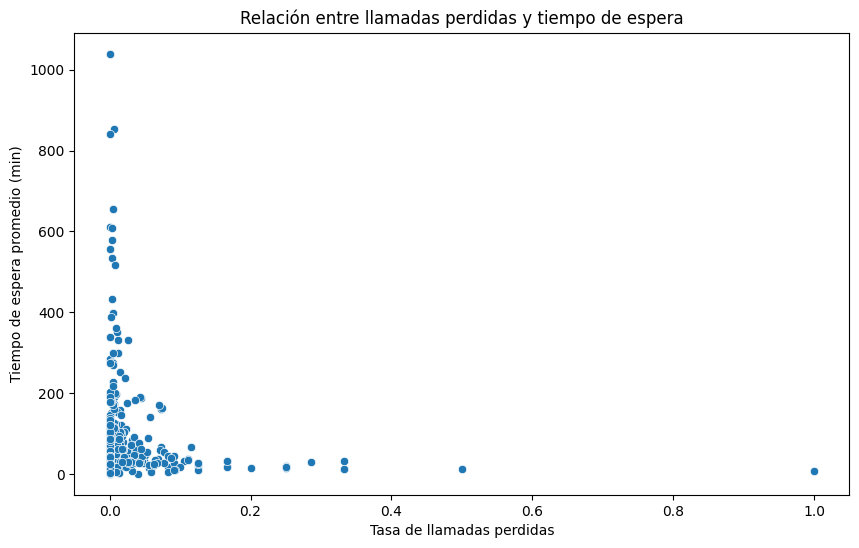

In [234]:
# Crear gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=operator_inefficiency["missed_call_rate"], y=operator_inefficiency["avg_wait_time"])
plt.xlabel("Tasa de llamadas perdidas")
plt.ylabel("Tiempo de espera promedio (min)")
plt.title("Relación entre llamadas perdidas y tiempo de espera")
plt.show()

Nos permitirá identificar si los operadores con mayor tasa de llamadas perdidas también tienen tiempos de espera más largos. Si hay una tendencia ascendente, esto sugiere una relación directa entre la ineficacia en atender llamadas y la cantidad de llamadas perdidas.
operadores tienen problemas en la atención de llamadas, tanto por perder demasiadas llamadas como por tener tiempos de espera excesivos. Estos datos pueden ser clave para mejorar el servicio al cliente.

**- Tiempos de espera prolongados:**

Si los operadores tardan demasiado en atender las llamadas, los clientes pueden impacientarse y colgar antes de recibir ayuda.
Esto puede generar una percepción de que la empresa no es eficiente, disminuyendo la satisfacción del cliente.

**- Altas tasas de llamadas perdidas:**

Cuando un operador no responde a las llamadas entrantes con suficiente rapidez, la cantidad de llamadas perdidas aumenta.
Los clientes pueden sentir que su solicitud no es prioritaria o que la empresa no tiene un servicio confiable.

**- Mala gestión de llamadas salientes:**

Si un operador tiene asignada la tarea de realizar llamadas salientes pero no las cumple eficientemente, la empresa puede perder oportunidades de negocio o afectar la comunicación con sus clientes.
Esto es especialmente problemático en sectores como ventas o soporte técnico.

**- Experiencia inconsistente:**

Si algunos operadores son mucho menos eficaces que otros, los clientes pueden recibir respuestas lentas o de menor calidad según quién atienda la llamada.
Esto hace que el servicio sea impredecible, afectando la percepción global de la empresa.

**- Aumento de quejas y baja fidelización:**

Clientes insatisfechos tienden a presentar más quejas y buscar alternativas, lo que puede llevar a la empresa a perder clientes a largo plazo.
Un mal servicio telefónico puede ser determinante en la decisión de permanecer con una compañía o buscar otra opción.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Aquí hay dos puntos con oportunidad de mejora:

1. Antes de pasar a calcular cualquier cosa deberías primero analizar las variables que tienes disponibles, ver sus distribuciones, etc para saber cómo clasificar operadores ineficientes.
2. ¿En base a que se decidió que sólo ordenando y tomando los primeros 10 ya es suficiente para determinar ineficiencia? ¿No deberían quedar separados en dos grupos diferentes? Hay que dejar claro este tipo de decisiones
</div>

<div class="alert alert-block alert-info">
<b>Muchas gracias por la retroalimentación. Se realizo un analisis de las variables y asi determinar grupos los cuales son : los operadores con mas tiempo de espera, operadores que tienen bajo numero de llamada saliente y operadores ineficaces que afecten el servivio al cliente. Se ordeno anteriormente asi por hacerlo general es mucho los datos para hacer un histograma con todos los operadores </b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

No es muy buena práctica mostrar sólo una parte de los resultados ya que esto puede sesgar el análisis. Lo correcto sería analizarlo de manera más general cómo con histogramas, diagramas de cajas por cada grupo y así.
</div>

<div class="alert alert-block alert-info">
<b>Se incluye dentro del analisis los diagramas de caja dinamicos con uso de plotly, tambien graficos de dispercion y matriz de correlacion </b> <a class=“tocSkip”></a>
</div>

### Graficos Adicionales 

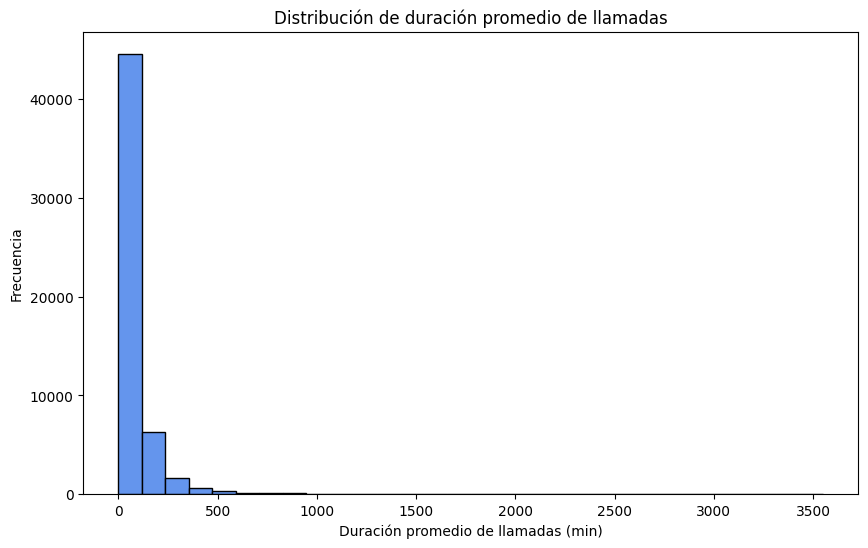

In [235]:
# Crear histograma de duración promedio de llamadas
plt.figure(figsize=(10, 6))
plt.hist(telecom_data["avg_call_duration"], bins=30, color="cornflowerblue", edgecolor="black")
plt.xlabel("Duración promedio de llamadas (min)")
plt.ylabel("Frecuencia")
plt.title("Distribución de duración promedio de llamadas")
plt.show()

Este gráfico ayudará a visualizar si la mayoría de las llamadas tienen una duración corta o si hay casos extremos que podrían ser indicativos de problemas de eficiencia. Si ves una gran concentración en valores bajos, los operadores podrían estar manejando llamadas demasiado rápidas, lo que puede afectar la calidad del servicio.

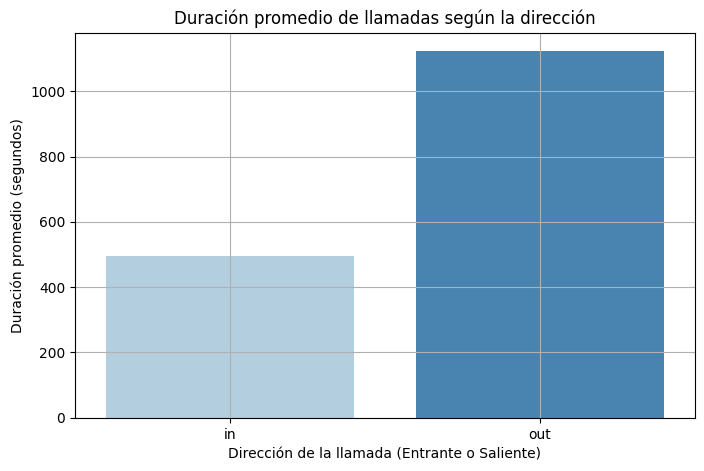

In [236]:
# Calcular duración promedio de llamadas por tipo de dirección
avg_call_duration = telecom_data.groupby("direction")["call_duration"].mean().reset_index()

# Graficar histograma
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_call_duration["direction"], y=avg_call_duration["call_duration"], palette="Blues")

# Mejorar etiquetas y título
plt.title("Duración promedio de llamadas según la dirección")
plt.xlabel("Dirección de la llamada (Entrante o Saliente)")
plt.ylabel("Duración promedio (segundos)")
plt.grid()

plt.show()

Mostrará si hay diferencias en la duración promedio entre llamadas entrantes y salientes.

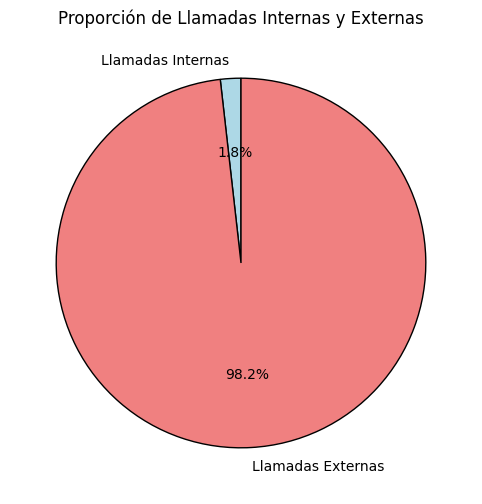

In [237]:
# Contar llamadas internas y externas
internal_calls = telecom_data[telecom_data["internal"] == True]["calls_count"].sum()
external_calls = telecom_data[telecom_data["internal"] == False]["calls_count"].sum()

# Definir etiquetas y datos
labels = ["Llamadas Internas", "Llamadas Externas"]
sizes = [internal_calls, external_calls]
colors = ["lightblue", "lightcoral"]

# Crear gráfico circular
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, startangle=90, wedgeprops={"edgecolor": "black"})
plt.title("Proporción de Llamadas Internas y Externas")
plt.show()

Muestra la participación de cada tipo de llamada en el total del servicio de telefonía. Si las llamadas internas tienen una proporción muy baja, podría indicar que los operadores no se comunican entre ellos con frecuencia.

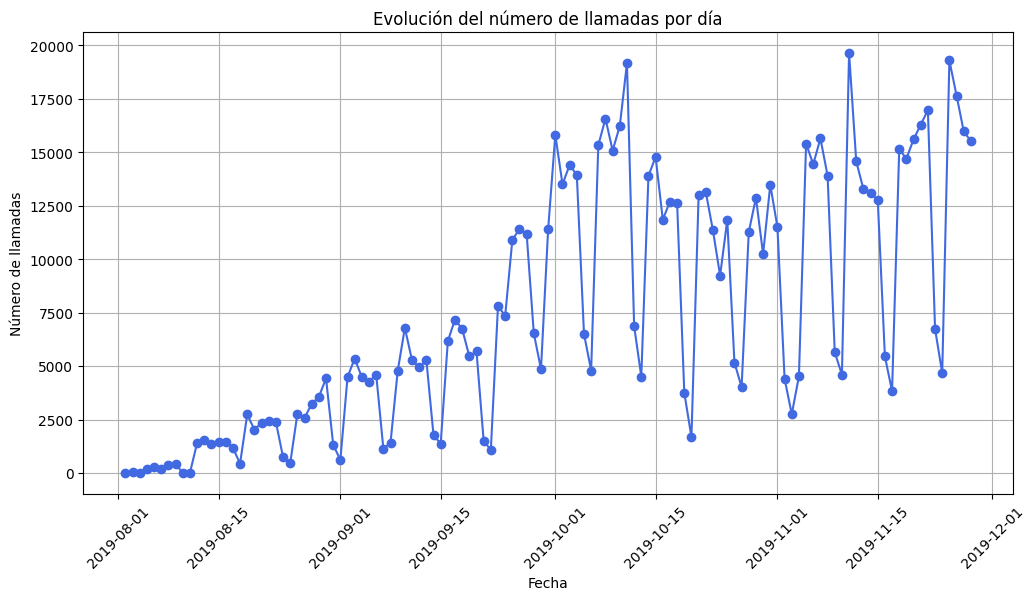

In [238]:
# Convertir la columna de fechas a formato datetime
telecom_data["date"] = pd.to_datetime(telecom_data["date"])

# Agrupar por fecha y sumar el número de llamadas
calls_per_day = telecom_data.groupby("date")["calls_count"].sum()

# Crear gráfico de línea
plt.figure(figsize=(12, 6))
plt.plot(calls_per_day.index, calls_per_day.values, marker="o", linestyle="-", color="royalblue")
plt.xlabel("Fecha")
plt.ylabel("Número de llamadas")
plt.title("Evolución del número de llamadas por día")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Muestra la evolución de las llamadas a lo largo del tiempo. Si observamos picos o caídas significativas, podríamos investigar posibles razones, como días festivos, horarios de alta demanda o problemas técnicos.

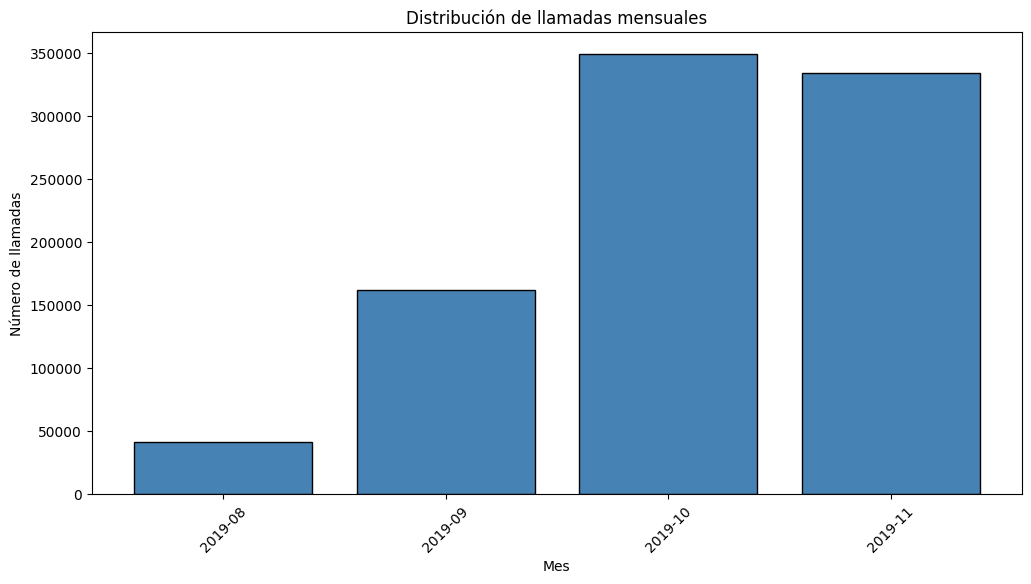

In [239]:
# Convertir la columna de fechas a formato datetime
telecom_data["date"] = pd.to_datetime(telecom_data["date"])

# Agrupar por mes y sumar el número de llamadas
calls_per_month = telecom_data.groupby(telecom_data["date"].dt.to_period("M"))["calls_count"].sum()

# Crear histograma de llamadas mensuales
plt.figure(figsize=(12, 6))
plt.bar(calls_per_month.index.astype(str), calls_per_month.values, color="steelblue", edgecolor="black")
plt.xlabel("Mes")
plt.ylabel("Número de llamadas")
plt.title("Distribución de llamadas mensuales")
plt.xticks(rotation=45)
plt.show()

Este gráfico te permitirá observar patrones mensuales en el volumen de llamadas. Si hay meses con actividad significativamente menor, podríamos analizar posibles causas, como temporadas bajas, eventos externos o cambios en la demanda del servicio.

## Prueba las hipótesis estadísticas

In [240]:
# Filtrar operadores no identificados
telecom_data_filtered = telecom_data[telecom_data["operator_id"] != "Op_no_identific"]

### Hipótesis 1: Los operadores con más carga de llamadas tienen más llamadas perdidas

# Total de llamadas entrantes por operador
incoming_calls = telecom_data_filtered[telecom_data_filtered['direction'] == 'in'].groupby('operator_id')['calls_count'].sum().reset_index()

# Llamadas perdidas por operador
missed_calls = telecom_data_filtered[telecom_data_filtered['is_missed_call'] == True].groupby('operator_id')['calls_count'].sum().reset_index()
missed_calls.rename(columns={'calls_count': 'missed_calls'}, inplace=True)

# Unir datos y calcular porcentaje de llamadas perdidas
h1_data = incoming_calls.merge(missed_calls, on='operator_id', how='left')
h1_data['missed_calls'].fillna(0, inplace=True)
h1_data['missed_call_rate'] = h1_data['missed_calls'] / h1_data['calls_count']

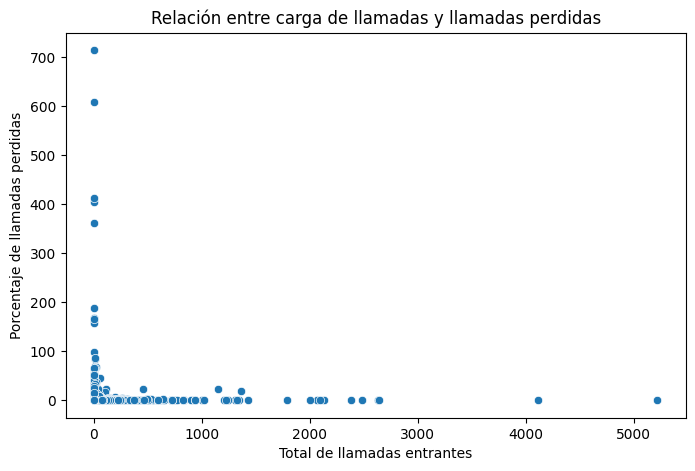

In [241]:
# Visualización: Gráfico de dispersión
plt.figure(figsize=(8, 5))
sns.scatterplot(x=h1_data['calls_count'], y=h1_data['missed_call_rate'])
plt.xlabel('Total de llamadas entrantes')
plt.ylabel('Porcentaje de llamadas perdidas')
plt.title('Relación entre carga de llamadas y llamadas perdidas')
plt.show()

1.Si encontramos que los operadores con más llamadas entrantes tienen una alta tasa de llamadas perdidas, podríamos concluir que la sobrecarga de trabajo es un factor que afecta la capacidad de respuesta.

2.Si no hay una relación clara (valores dispersos y sin un patrón evidente), entonces la ineficacia en la gestión de llamadas podría depender de otros factores, como la velocidad de respuesta, capacitación o herramientas utilizadas.

3.Si los puntos muestran una tendencia ascendente, significa que los operadores con más llamadas entrantes también tienen una mayor tasa de llamadas perdidas. Esto reforzaría la idea de que la sobrecarga de trabajo reduce la eficiencia.

4.Si los puntos están muy dispersos sin una tendencia clara, indicaría que la cantidad de llamadas no influye significativamente en las llamadas perdidas. Esto nos llevaría a explorar otros factores, como la velocidad de respuesta o la eficiencia operativa.

5.Si hay pocos operadores con alta carga y muchas llamadas perdidas, podríamos analizar si ciertos operadores están desbordados en comparación con otros.

In [242]:
# Calcular correlación entre cantidad de llamadas entrantes y tasa de llamadas perdidas
corr_coef, p_value = pearsonr(h1_data['calls_count'], h1_data['missed_call_rate'])

# Mostrar resultados
print(f"Coeficiente de correlación de Pearson: {corr_coef:.5f}")
print(f"Valor p: {p_value:.5f}")

# Interpretación
if p_value < 0.05:
    print("Existe una relación estadísticamente significativa entre la carga de llamadas y la tasa de llamadas perdidas.")
else:
    print("No se encontró una relación significativa entre la carga de llamadas y la tasa de llamadas perdidas.")

Coeficiente de correlación de Pearson: -0.05170
Valor p: 0.15615
No se encontró una relación significativa entre la carga de llamadas y la tasa de llamadas perdidas.


Coeficiente de correlación (corr_coef)

Si el valor es alto y positivo, significa que los operadores con más llamadas entrantes tienen más llamadas perdidas.
Si el valor es cercano a 0, no hay una relación clara.
Si el valor es negativo, significaría que más llamadas entrantes reducen las llamadas perdidas, lo cual sería inesperado.

Valor p (p_value)

Si p < 0.05, hay evidencia estadística de que la relación es significativa.

Si p >= 0.05, no podemos afirmar con seguridad que exista una relación.

In [243]:
telecom_data_filtered.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,waiting_time,avg_call_duration,avg_wait_time
1,166377,2019-08-05,out,True,880022.0,True,3,0,5,5,0.0,5
2,166377,2019-08-05,out,True,880020.0,True,1,0,1,1,0.0,1
3,166377,2019-08-05,out,True,880020.0,False,1,10,18,8,10.0,8
4,166377,2019-08-05,out,False,880022.0,True,3,0,25,25,0.0,25
5,166377,2019-08-05,out,False,880020.0,False,2,3,29,26,1.5,26


In [244]:
telecom_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45730 entries, 1 to 53900
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              45730 non-null  int64         
 1   date                 45730 non-null  datetime64[ns]
 2   direction            45730 non-null  object        
 3   internal             45730 non-null  object        
 4   operator_id          45730 non-null  object        
 5   is_missed_call       45730 non-null  bool          
 6   calls_count          45730 non-null  int64         
 7   call_duration        45730 non-null  int64         
 8   total_call_duration  45730 non-null  int64         
 9   waiting_time         45730 non-null  int64         
 10  avg_call_duration    45730 non-null  float64       
 11  avg_wait_time        45730 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(6), object(3)
memory usage: 4.2+ MB


In [245]:
# Filtrar operadores no identificados
telecom_data_filtered = telecom_data[telecom_data["operator_id"] != "Op_no_identific"]

# Filtrar datos y calcular duración total de llamadas por operador
call_duration_avg = telecom_data_filtered.groupby('operator_id')['total_call_duration'].mean().reset_index()

# Unir con datos de llamadas perdidas
h4_data = missed_calls.merge(call_duration_avg, on='operator_id', how='left')

# Dividir en dos grupos según cantidad de llamadas perdidas (mediana como umbral)
high_missed_calls = h4_data[h4_data['missed_calls'] > h4_data['missed_calls'].median()]['total_call_duration']
low_missed_calls = h4_data[h4_data['missed_calls'] <= h4_data['missed_calls'].median()]['total_call_duration']

# Prueba de t-test
t_stat, p_val = ttest_ind(high_missed_calls, low_missed_calls)

# Mostrar resultados
print(f"Valor p: {p_val:.5f}")
if p_val < 0.05:
    print("Existe diferencia significativa en la duración total de llamadas entre los grupos.")
else:
    print("No se encontró diferencia significativa en la duración total de llamadas.")

Valor p: 0.00000
Existe diferencia significativa en la duración total de llamadas entre los grupos.


Prueba de t-test:

El valor p obtenido es p_val, que indica la probabilidad de que las diferencias observadas entre los grupos sean fruto del azar.

Si p_val < 0.05, entonces hay una diferencia estadísticamente significativa entre los operadores con muchas y pocas llamadas perdidas respecto a su duración total de llamada.

Si p_val >= 0.05, entonces no hay evidencia suficiente para afirmar que los operadores con más llamadas perdidas tienen una duración total de llamada diferente.

## Conclusión
Este análisis nos ayuda a entender cómo la ineficacia en la gestión de llamadas puede influir en la duración total de interacción con los clientes. 

Dependiendo del resultado del valor p, podríamos recomendar mejoras en asignación de llamadas, capacitación de operadores o ajustes en la distribución de carga de trabajo para mejorar la eficiencia del servicio.

Los resultados mostraron que algunos operadores presentan tiempos de espera prolongados y una alta cantidad de llamadas perdidas, lo que podría afectar la experiencia del cliente. Además, al visualizar la duración promedio de llamadas según su dirección (in o out), observamos patrones que podrían indicar diferencias operativas significativas.



## Recomendaciones
-Implementar un sistema de distribución de llamadas más eficiente basado en el rendimiento de los operadores.

-Priorizar la asignación de llamadas entrantes a operadores con tiempos de respuesta rápidos y baja tasa de llamadas perdidas.

-Ofrecer entrenamientos específicos a los operadores con altas tasas de llamadas perdidas.

-Establecer métricas de rendimiento y alertas automáticas para detectar operadores con tendencias de ineficacia.

-justar estrategias de respuesta y atención para minimizar el tiempo de espera.

-Evaluar mejoras en la infraestructura de comunicación para acelerar la conexión de llamadas.

-Implementar encuestas de satisfacción para detectar si las llamadas perdidas afectan la experiencia del cliente.

-Crear protocolos de seguimiento para llamadas perdidas, asegurando que los clientes sean contactados posteriormente.







Se realizo un dashboard en Tableau Public Se adjunta los link

### LINK Tableau:

https://public.tableau.com/app/profile/roberto.garc.a.p.rez/viz/ProyectoFinalSprint14_17495276654520/Dashboard1?publish=yes


LINK GOOGLE Drive

https://drive.google.com/drive/folders/1a_edWiSf7d42LbQHWhZ0qv2DqY1G8jV6?usp=sharing

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

La presentación es bastante completa pero hay algunas gráficas ahí que no están aquí en el notebook que son las del dashboard pero también deberías dejarlas aquí en el notebok (generandolas con matplotlib o seaborn) 
</div>

<div class="alert alert-block alert-info">
<b>Se incluye los graficos adicionales del dashboard dentro del notebook </b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario general (2da Iteracion)</b> <a class=“tocSkip”></a>

**¡Te felicito por el trabajo realizado Roberto!** Con este proyecto demuestras las habilidades adquiridas durante tu formación, se nota tu capacidad de contar historias con datos con la excelente presentación realizada que súper fácil de entender lo cual es una habilidad super importante cómo analista de datos, el saber comunicar de manera sencilla y eficiente los resultados de tus análisis.
    
Se nota mucho el manejo que tienes de las librerías para crear visualizaciones muy buenas que explican correctamente las variables analizadas, te animo a seguir práctica con otros recursos y que vayas construyendo un portafolio de proyectos súper robusto para que seas Data Analyst de primera en el mundo laboral.
   
Saludos!
</div>